## Real state Price Predictor

In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv("datas.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF075A2688>,
      dtype=object)

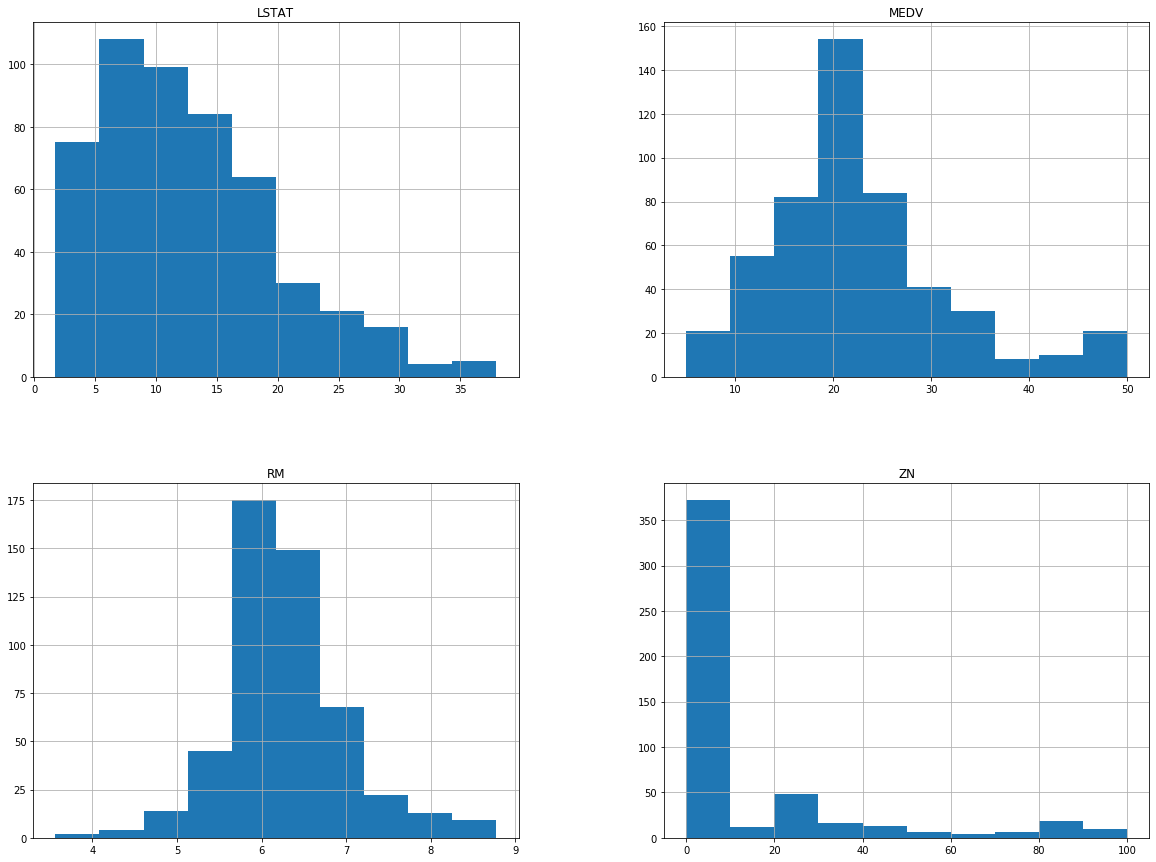

In [8]:
import matplotlib.pyplot as plt
housing.hist(["MEDV","RM","ZN","LSTAT"],figsize=(20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF07DCEF48>,
      dtype=object)

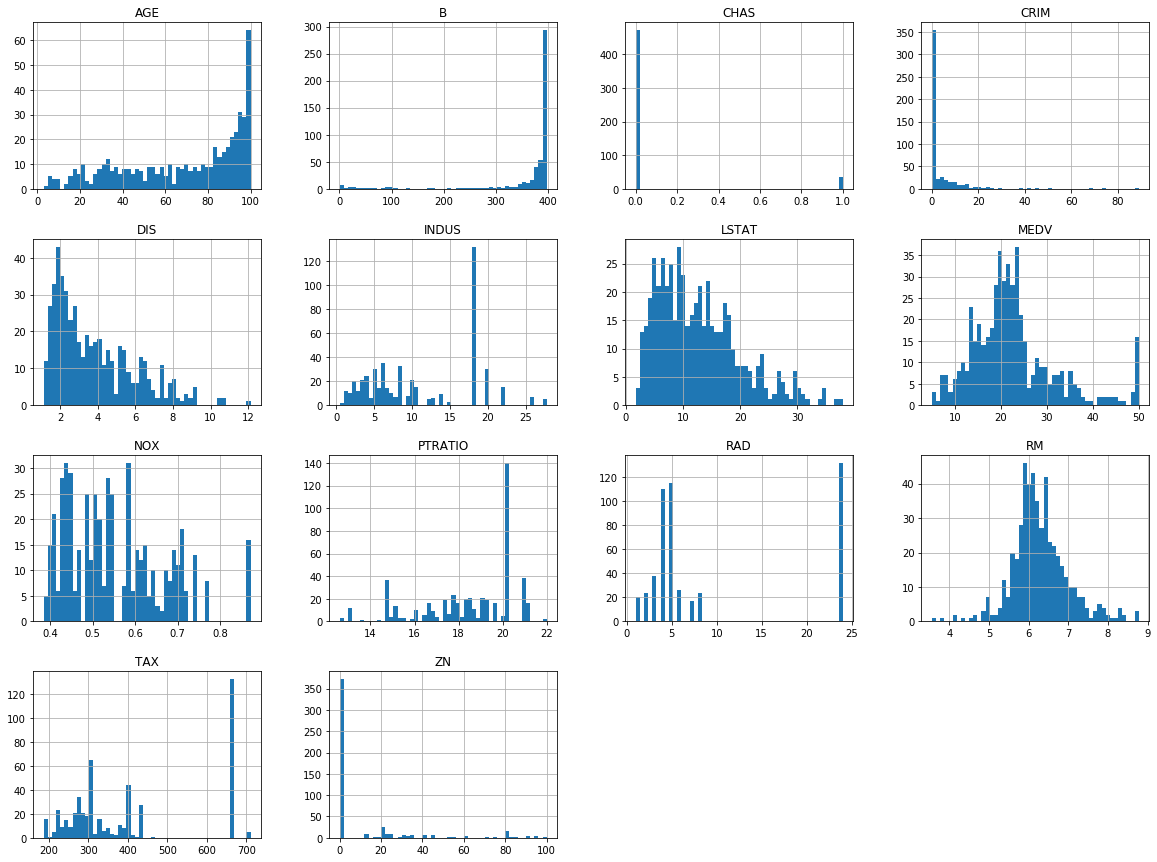

In [9]:
housing.hist(bins=50,figsize=(20,15))

## Train-test splitting

In [10]:
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    print(f"dataset data number length{len(data)}")
    print(f"shuffled dataset \n{shuffled}")
    test_train_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_train_size]
    train_indices=shuffled[test_train_size:]
    print( f"test_indices passed inside data.iloc function \n {data.iloc[test_indices]}")
    print(f"train_indices passed inside data.iloc function \n {data.iloc[train_indices]}")
    print(f"only test_indices shown in array form \n {test_indices}")
    print(f"only train_indices shown in array form \n {train_indices}")
    return data.iloc[train_indices],data.iloc[test_indices]

In [11]:
train_set,test_set=split_train_test(housing,0.2)

dataset data number length506
shuffled dataset 
[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  8

In [12]:
print(f"Rows in training set {len(train_set)} \n Rows in test set {len(test_set)}")

Rows in training set 405 
 Rows in test set 101


In [13]:
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows in training set {len(train_set)} \n Rows in test set {len(test_set)}")

Rows in training set 404 
 Rows in test set 102


In [14]:
train_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.317030,68.556436,3.808195,9.356436,404.032178,18.318317,356.278342,12.457351,22.796535
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.712692,27.994922,2.131226,8.589721,166.172655,2.228701,91.566533,7.110381,9.332147
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.888750,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.772500,16.950000
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,391.305000,10.925000,21.600000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.643750,93.650000,5.400800,12.000000,666.000000,20.200000,395.755000,16.372500,26.400000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,101.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.630947,10.549020,11.737745,0.058824,0.547609,6.154881,68.648039,3.742949,10.313725,424.892157,18.999020,358.241275,13.428235,21.488235
std,7.459607,24.083242,6.722576,0.236456,0.108602,0.664395,28.890866,2.010749,9.161889,177.462472,1.800577,90.641872,7.244601,8.605804
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.561000,6.200000,1.169100,1.000000,188.000000,13.000000,6.680000,2.880000,5.000000
25%,0.087368,0.000000,6.102500,0.000000,0.448250,5.869000,43.800000,2.263950,4.000000,281.750000,18.400000,375.020000,7.687500,17.125000
50%,0.209885,0.000000,10.590000,0.000000,0.532000,6.167000,74.700000,3.353400,5.000000,345.000000,19.200000,392.205000,12.335000,20.150000
75%,4.522473,0.000000,18.100000,0.000000,0.621500,6.471000,95.225000,4.764825,24.000000,666.000000,20.200000,396.900000,18.017500,24.075000
max,45.746100,95.000000,27.740000,1.000000,0.871000,8.034000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


In [16]:
split=StratifiedShuffleSplit(n_splits=1,test_size=.2,random_state=42)

In [17]:
for train_index,test_index in split.split(housing,housing['CHAS']):
    print(f"passed through panda iloc function \n{housing.iloc[train_index]}")
    print(f"passed through panda loc function \n{housing.loc[train_index]}")
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]


passed through panda iloc function 
        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
254  0.04819  80.0   3.64     0  0.392  6.108  32.0  9.2203    1  315   
348  0.01501  80.0   2.01     0  0.435  6.635  29.7  8.3440    4  280   
476  4.87141   0.0  18.10     0  0.614  6.484  93.6  2.3053   24  666   
321  0.18159   0.0   7.38     0  0.493  6.376  54.3  4.5404    5  287   
326  0.30347   0.0   7.38     0  0.493  6.312  28.9  5.4159    5  287   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
155  3.53501   0.0  19.58     1  0.871  6.152  82.6  1.7455    5  403   
423  7.05042   0.0  18.10     0  0.614  6.103  85.1  2.0218   24  666   
98   0.08187   0.0   2.89     0  0.445  7.820  36.9  3.4952    2  276   
455  4.75237   0.0  18.10     0  0.713  6.525  86.5  2.4358   24  666   
216  0.04560   0.0  13.89     1  0.550  5.888  56.0  3.1121    5  276   

     PTRATIO       B  LSTAT  MEDV  
254     16.4  392.89   6.57  21.9  
348     17.0  3

In [18]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.303353,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.662996,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000
25%,0.057828,0.000000,4.950000,0.000000,0.448000,5.912750,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.176000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.539500,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
strat_train_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279481,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716784,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


In [20]:
housing=strat_train_set.copy()
housing_test_data=strat_test_set.copy()

## Looking for Correlations

In [21]:
corr_matrix=housing.corr(method ='pearson')
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [22]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF0B4DB9C8>,
      dtype=object)

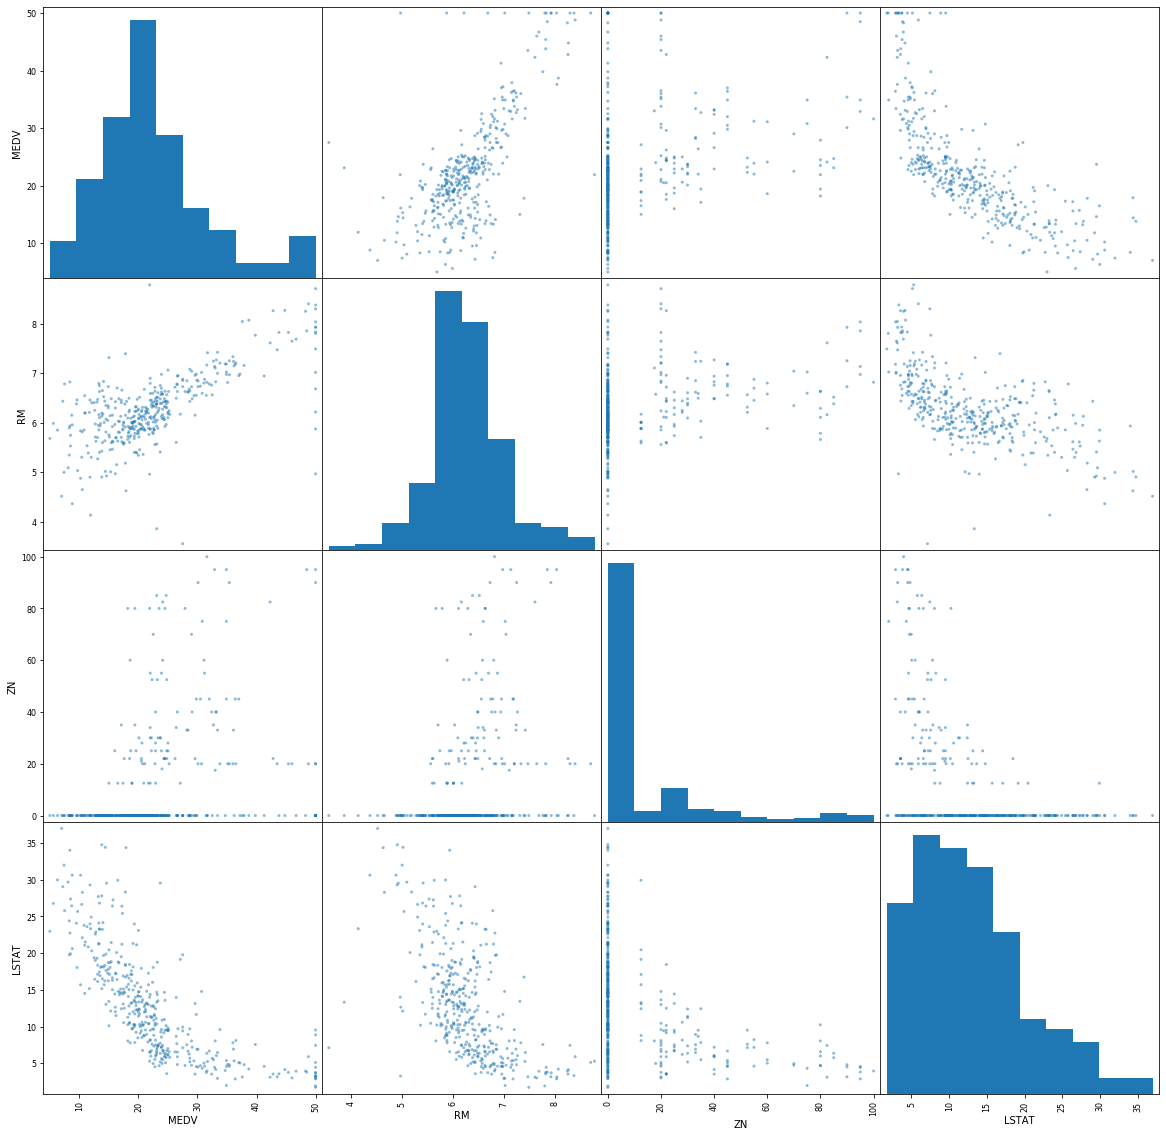

In [23]:
attributes=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(20,20))

In [24]:
housing["MEDV"]
count=0
for house in housing["MEDV"]:
    if(house>19.5 and house <24):
        count=count+1
print(count)

115


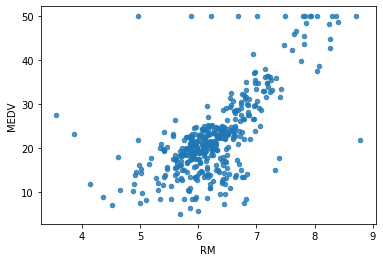

In [25]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=.8)

## Trying out Attribute combinations

In [26]:
housing["TAXRM"]=housing["TAX"]/housing["RM"]

In [27]:
housing["TAXRM"]

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [28]:
corr_matrix=housing.corr(method ='pearson')
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.528626
LSTAT     -0.740494
Name: MEDV, dtype: float64

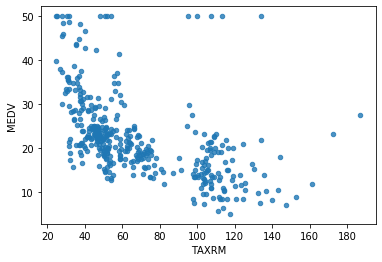

In [29]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=.8)

# Finishing attribute contribution

## Separating labels(MEDV) and features(REST DATAS) 

In [30]:
housing=strat_train_set.drop("MEDV",axis="columns")
housing_labels= strat_train_set["MEDV"].copy()
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13


## Missing Attributes

In [31]:
# To take care missing attributes you have three options:
#     1.Get rid of the missing data points(Delete missing data point columns)
#     2.Get rid of whole attribute
#     3.Set the value to some value(0 or mean or median)

In [32]:
a=housing.dropna(subset=["RM"]) # Option 1 , Original dataframe will be unchanged as we haven't put inplace=true
a.shape

(399, 13)

In [33]:
housing.drop("RM",axis="columns").shape # Option 2 , Original dataframe will be unchanged as we haven't put inplace=true

(404, 12)

In [34]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15


In [35]:
median=housing["RM"].median()

In [36]:
housing["RM"].fillna(median)#option 3 , Original dataframe will be unchanged as we haven't put inplace=true

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [37]:
housing["RM"].count()

399

In [38]:
housing.shape

(404, 13)

In [39]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [40]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [41]:
X=imputer.transform(housing)

In [42]:
housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [43]:
housing_tr=pd.DataFrame(X,columns=housing.columns)

In [44]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

Primarily, three types of objects:
        1.Estimators: Estimates some parameter based on a dataset. Eg. imputer. It has fit method and transform method. 
        Fit method fits the dataset and calculates internal parameters
        2.Transformers:Transform method takes input and returns output based on learnings from fit(). It has a convenience
        function called fit_transform() which fits and then transforms.
        3.Predictors: LinearRegression model is an example of predictor.fit() and predict() are two common functions. It
        also gives score() function which will evaluate the predictions.

## Feature Scaling


primarily two types of feature scaling methods:

    1.MinMax scaling(Normalization):
     (value-min)/(max-min)
     sklearn provides a class called MinMaxScaler for this
    2.Standardization:
     (value-mean)/std
     sklearn provides a class called StandardScaler for this

## Creating a Pipeline

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ("imputer",SimpleImputer(strategy="median")),
    #add as many as you want
    ("std_scaler",StandardScaler()),
])

In [46]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [47]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

## Selecting a desired model for Real State

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model=LinearRegression()
model=DecisionTreeRegressor()
model=RandomForestRegressor(random_state=176)
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=176, verbose=0, warm_start=False)

In [49]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
prepared_temporary_for_testing=my_pipeline.transform(some_data)# used previously calculated median ,variance for standardization
                                                                #used 404 samples
prepared_temporary_for_testing

array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
        -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
        -0.97491834,  0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, -0.27288841, -1.0542567 ,
         0.5009123 , -1.3938808 ,  2.19312325, -0.65766683, -0.78557904,
        -0.69277865,  0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, -0.27288841,  0.47919371,
         0.28867984,  0.87020968, -0.68730678,  1.63579367,  1.50571521,
         0.81196637,  0.44624347,  0.81480158],
       [-0.42292925, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.13688444, -0.52225911,  0.37882487, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.81939807],
       [-0.40786253, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.04693161, -1.42222622,  0.79643404, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.91902752]])

In [50]:
# prepared_temporary_for_testing1=my_pipeline.fit_transform(some_data)# used newly from present inserted datas, 
#                                                                         #to calculate median ,variance for standardization
#                                                                         #used 5 samples inserted newly from previous sample
# prepared_temporary_for_testing1

In [51]:
model.predict(prepared_temporary_for_testing)

array([22.259, 25.499, 16.382, 23.48 , 23.434])

In [52]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the Model: 

In [53]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(mse)
rmse

1.2147923599211392

## Using Better Evaluation Technique - Cross Validation

In [54]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
# rmse_score=np.sqrt(-scores)

In [55]:
# rmse_score

In [56]:
# def print_score(scores):
#     print("scores ",scores)
#     print("Mean ",scores.mean())
#     print("Standard Deviation ",scores.std())

In [57]:
# print_score(rmse_score)

## Saving the model 

In [58]:
from joblib import dump, load

In [59]:
dump(model,"samsofts.joblib")

['samsofts.joblib']

## Testing the model on test data

In [60]:
# X_housing_test_data_prepared=my_pipeline.transform(housing_test_data.drop(["MEDV"],axis="columns"))
# final_predictions=model.predict(X_housing_test_data_prepared)
# final_mse=mean_squared_error(housing_test_data["MEDV"].copy(),final_predictions)
# final_rmse=np.sqrt(final_mse)
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [61]:
final_rmse

2.930243229213734

In [62]:
prepared_temporary_for_testing[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using the model

In [63]:
from joblib import dump, load
import numpy as np
model = load('samsofts.joblib') 
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)

array([24.583])